# Exploration of Soccer Dataset
### Research task: show most valued attributes for field players
Used European Soccer Dataset from <a href='https://www.kaggle.com/paosheng/european-soccer-database'>www.kaggle.com<a/>


In [1]:
#import required liblaries
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 1. Acquire data
Dataset European Soccer is the sqlite db, so use sqlite3 library 

In [2]:
conn = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


## Step 2. Data preparation
We see that table *Player_Attributes* contains attributes as for field players as for goalkeepers ('gk_diving' attribute for example). Because different skills required for both groups we must define how to select data only for field players.

In [3]:
#Remove Nans for initial data analysis
df.dropna(how='any', axis=0, inplace=True);

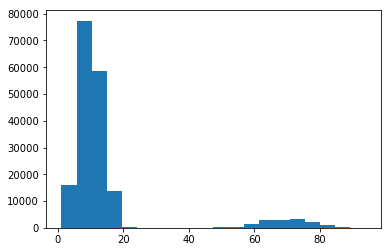

In [4]:
# Breefly look at distribution of attributes
plt.hist(df['gk_diving'], bins=20)
plt.show()

We see, that goalkeepers attributes has bimodal distribution. We may assume that high values of attributes relates to goalkeepers, low values for other players. So, we can divide data by *gk_diving* attribute. 

Selects only data required data (attributes and row related to field players)

In [5]:
#Take required dependent variable with key
dep = df.loc[:, ['id','overall_rating']].columns
#Take independent variables
columns = dep.append(df.loc[:, 'crossing':'sliding_tackle'].columns)

#Select data related to field players
filtered = df[df['gk_diving']<25]
selecteddata = filtered[columns]
selecteddata.head()

,id,overall_rating,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle
0,1,67.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0
1,2,67.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0
2,3,62.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0
3,4,61.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0
4,5,61.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0


In [6]:
selecteddata.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165615.0,91789.326740,53038.960805,1.0,45982.5,91665.0,137451.5,183978.0
overall_rating,165615.0,68.667512,6.976079,33.0,64.0,69.0,73.0,94.0
crossing,165615.0,58.340422,13.881403,8.0,49.0,60.0,68.0,95.0
finishing,165615.0,52.752776,17.116430,7.0,39.0,56.0,66.0,97.0
heading_accuracy,165615.0,60.612034,12.311963,2.0,52.0,61.0,69.0,98.0
short_passing,165615.0,65.513800,9.986661,15.0,60.0,66.0,72.0,97.0
volleys,165615.0,52.309712,16.085748,6.0,40.0,54.0,65.0,93.0
dribbling,165615.0,62.818700,13.488270,2.0,56.0,65.0,72.0,97.0
curve,165615.0,56.102823,15.425054,10.0,45.0,58.0,68.0,94.0
free_kick_accuracy,165615.0,52.112073,15.677617,6.0,40.0,52.0,65.0,97.0


Now we have data ready for analysis

# Step 3. Data analysis
We assume that mostly valued attributed good correlated with *overall rating*. So, we calculate pair correlations between attributes and *overall rating*, select good correllated attributes thas has R≥0.40 and visualize.

Instead of use **corr** function for full and excess matrix of pair correlations, we transform data for calculate only necessary correlations via grouping

In [30]:
#Transform independent variables data in parameter/value form via melt
melteddata = pd.melt(selecteddata, id_vars=['id'], value_vars=attributeColumns, var_name='attribute', value_name='value_of_attribute',)
#Join with dependent variable on id of player
attributes = df[dep].merge(melteddata, on='id' )
attributes.head(12)

,id,overall_rating,attribute,value_of_attribute
0,1,67.0,crossing,49.0
1,1,67.0,finishing,44.0
2,1,67.0,heading_accuracy,71.0
3,1,67.0,short_passing,61.0
4,1,67.0,volleys,44.0
5,1,67.0,dribbling,51.0
6,1,67.0,curve,45.0
7,1,67.0,free_kick_accuracy,39.0
8,1,67.0,long_passing,64.0
9,1,67.0,ball_control,49.0


In [32]:
#calculate pair correlations with group by and aggregate function corr
groupedresult = attributes.groupby('attribute')['overall_rating', 'value_of_attribute'].agg('corr')
#Get even rows for clean up result
corrs = pd.DataFrame(groupedresult['value_of_attribute'].iloc[::2])
corrs.head(10)

,,value_of_attribute
attribute,,
acceleration,overall_rating,0.275184
aggression,overall_rating,0.366963
agility,overall_rating,0.260139
balance,overall_rating,0.175277
ball_control,overall_rating,0.706608
crossing,overall_rating,0.470939
curve,overall_rating,0.449042
dribbling,overall_rating,0.492527
finishing,overall_rating,0.390949


In [34]:
#Order correlations for visualization
orderedcorrs = corrs.sort_values(by=['value_of_attribute'], ascending=False)
#Drop poor correlated attributes
goodcorrs = orderedcorrs[orderedcorrs['value_of_attribute']>=0.4]

#prepare attribute names for use in charts
attributenames = pd.Series([str(name[0]) for name in goodcorrs.index[:]])
attributeColumns = selecteddata.loc[:, 'crossing':'sliding_tackle'].columns
readable_attributenames = attributenames[:].str.replace('_',' ').str.capitalize()
headers = dict(zip(attributenames, readable_attributenames))

readable_attributenames

0              Reactions
1           Ball control
2          Short passing
3             Shot power
4           Long passing
5                 Vision
6              Dribbling
7             Long shots
8               Crossing
9              Penalties
10           Positioning
11                 Curve
12      Heading accuracy
13               Volleys
14    Free kick accuracy
15               Stamina
dtype: object

# Step 4. Present data

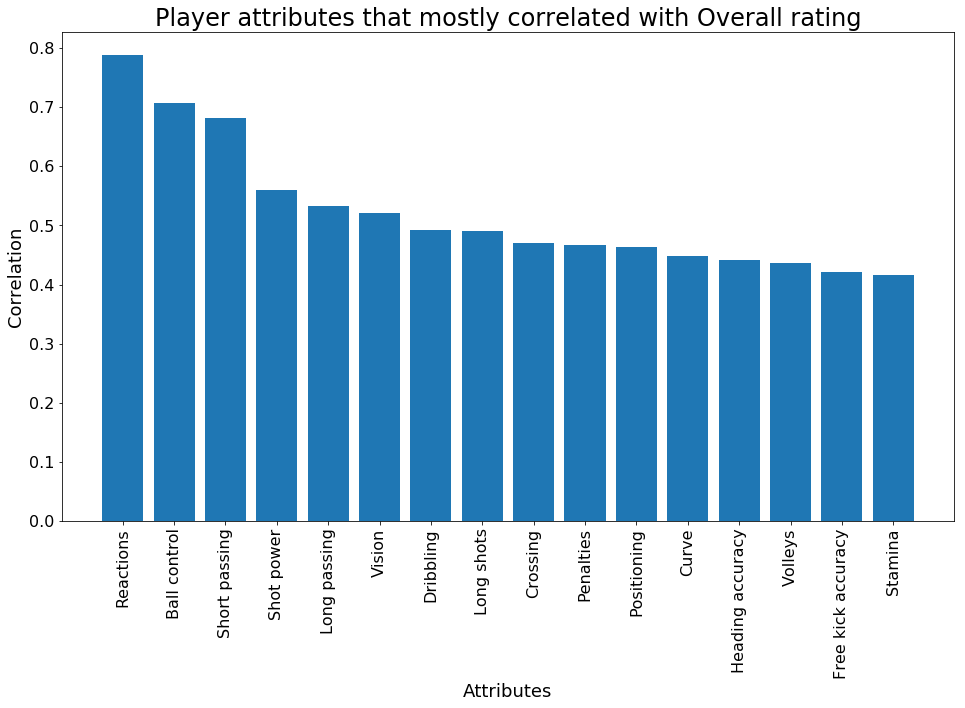

In [20]:
#Visualize data via bar chart of correlation coefficients. We must get styled chart because it for presentation 

plt.figure(num=None, figsize=(16, 9), dpi=72, facecolor='w', edgecolor='k')

plt.bar(attributenames.index, goodcorrs['value_of_attribute'].values)
plt.xticks(attributenames.index, readable_attributenames, rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Correlation', fontsize=18)
plt.xlabel('Attributes', fontsize=18)
plt.title('Player attributes that mostly correlated with Overall rating', fontsize=24)
plt.show()


# Additional tests

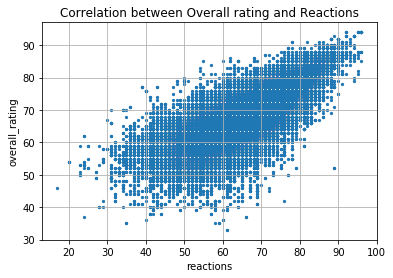

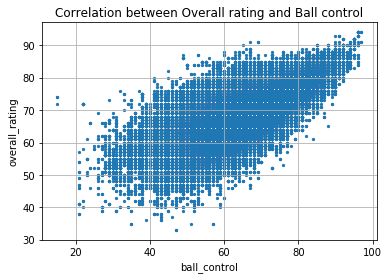

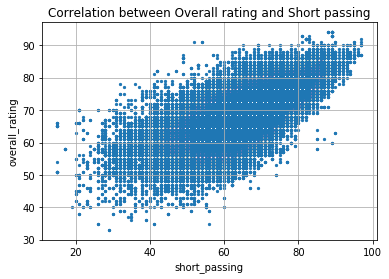

In [37]:
# We must make sure that correlations not distorted by outliers, multimodality etc. 
# Lets see scattertplots and histograms for top 3 attributes

for a in attributenames[:3]:
    plt.scatter(selecteddata[a], selecteddata['overall_rating'], s=5)
    plt.xlabel(a)
    plt.ylabel('overall_rating')
    plt.grid(True)
    plt.title('Correlation between Оverall rating and {}'.format(headers[a]))
    plt.show()

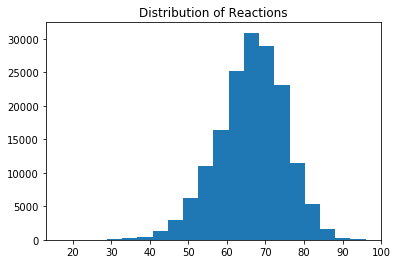

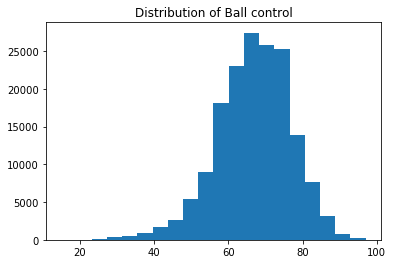

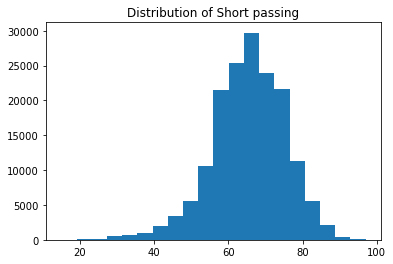

In [19]:
for a in attributenames[:3]:
    plt.hist(selecteddata[a], bins=20)
    plt.title('Distribution of {}'.format(headers[a]))
    plt.show()
    

# Resume: Most valued attributes for field players is:
* ## Reactions
* ## Ball control
* ## Short passing











In [ ]:
# eof